## Basic Gaussian distribution with Noise

This section is not very important and can be ignored. The emcee section can be used without having to run any code from here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def create_gaussian(mu, sigma, amplitude, size):

    # Create array space
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

    # Create distribution
    y = amplitude * 2.5 * norm.pdf(x, mu, sigma)

    return y

def noise(mu, sigma, ampltiude, size):

    # Create array space
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

    # Create distribution
    y = amplitude * np.random.normal(mu, sigma, size)

    return y

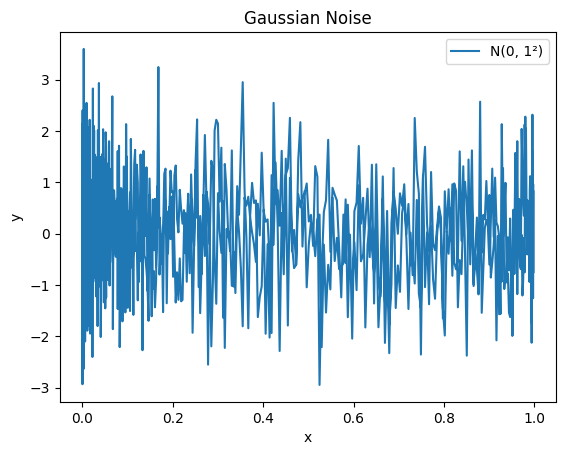

In [3]:
# Create Gaussian

mu = 0
sigma = 1
amplitude = 1
size = 1000

y_gaussian = create_gaussian(mu, sigma, amplitude, size)
y_noise = noise(mu, sigma, amplitude, size)

# Plot the distribution
plt.plot(y_gaussian, y_noise, label=f'N({mu}, {sigma}²)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Noise')
plt.legend()
plt.show()

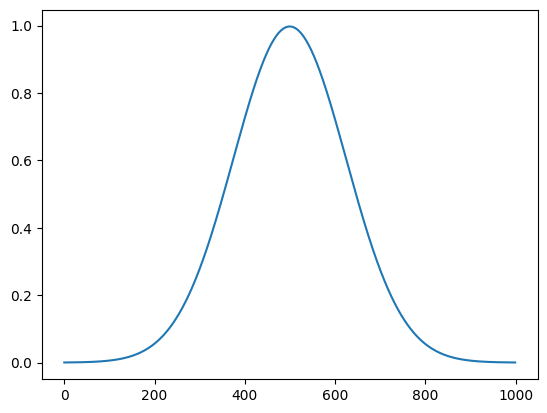

In [4]:
plt.plot(y_gaussian, label=f'N({mu}, {sigma}²)')

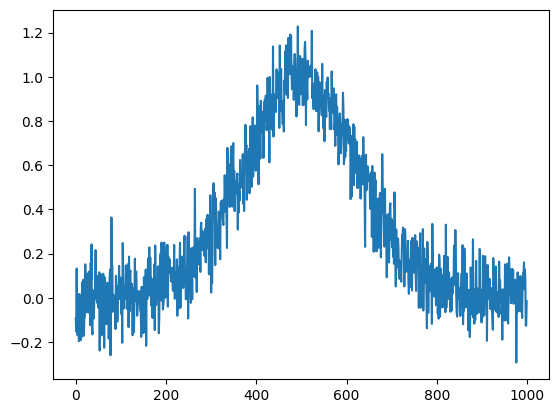

In [5]:
noise_coefficient = 0.1
y = y_gaussian + noise_coefficient * y_noise
plt.plot(y, label=f'N({mu}, {sigma}²)')

## EMCEE Library

We will use this section to test out code from the EMCEE library. Remember you can click on a cell and run all the code below it by pressing on Runtime at the top without having to execute the whole notebook.

In [6]:

import numpy as np
import emcee
import matplotlib.pyplot as plt

Using emcee for MCMC Model Fitting
The emcee package in Python is a powerful Markov Chain Monte Carlo (MCMC) sampler, commonly used for Bayesian inference. Below is a step-by-step guide on how to use emcee to fit a model to data.

Steps for MCMC Model Fitting Using emcee:

- Define a model (e.g., a linear model y=mx+b)

- Define the likelihood function (how probable the data is given model parameters).

- Define the prior distribution (our assumptions before seeing data).

- Define the posterior probability (likelihood × prior).

- Run the MCMC sampler to obtain the posterior distribution of parameters.


### Example: Fitting a Linear Model using MCMC

Let's assume we have noisy data generated from a linear model:

y=mx+b+noise

1. Generate Synthetic Data

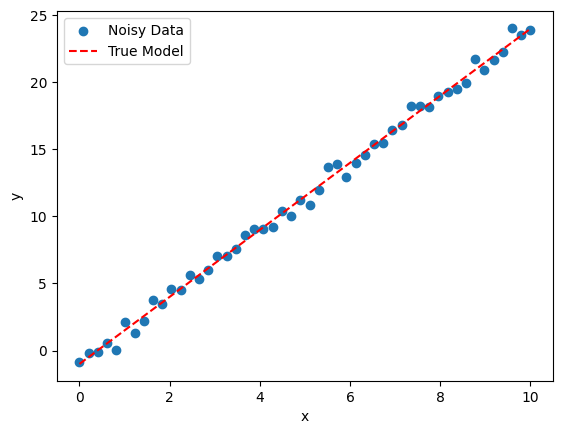

In [7]:
# True parameters
true_m = 2.5
true_b = -1.0
sigma = 0.5  # Noise standard deviation

# Generate x values
x = np.linspace(0, 10, 50)
y = true_m * x + true_b + np.random.normal(0, sigma, size=len(x))

# Plot the data
plt.scatter(x, y, label="Noisy Data")
plt.plot(x, true_m * x + true_b, color="red", label="True Model", linestyle="dashed")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### Define the Log-Likelihood Function
The likelihood function measures how well the model explains the data. Assuming Gaussian errors:

$
 \log P(y|m, b, \sigma) = -\frac{1}{2} \sum \left( \frac{(y_i - (m x_i + b))^2}{\sigma^2} + \log(2\pi\sigma^2) \right)
$

In [8]:
def log_likelihood(theta, x, y):
    m, b, log_sigma = theta
    sigma = np.exp(log_sigma)  # Ensure sigma is positive
    model = m * x + b
    return -0.5 * np.sum(((y - model) / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2))

### Define the Log-Prior Function
We assume uniform priors for  m and b, and a broad normal prior for log σ:

In [9]:
def log_prior(theta):
    m, b, log_sigma = theta
    if -10 < m < 10 and -10 < b < 10 and -5 < log_sigma < 1:
        return 0.0  # Log of a uniform distribution is constant
    return -np.inf  # Log(0) → reject sample

###  Define the Log-Posterior Function
The posterior is given by:

$
\log P(m, b, \sigma | y) = \log P(y | m, b, \sigma) + \log P(m, b, \sigma)
$

In [10]:
def log_posterior(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf  # Reject invalid samples
    return lp + log_likelihood(theta, x, y)

### Run the MCMC Sampler

We initialize multiple walkers (chains) in random positions.

In [11]:
# Number of walkers (parallel chains)
n_walkers = 20
n_dim = 3  # Parameters: m, b, log_sigma
n_steps = 5000  # Number of MCMC steps

# Initial positions: Small random perturbations around reasonable values
initial_positions = np.array([2.0, -1.0, np.log(0.5)]) + 0.1 * np.random.randn(n_walkers, n_dim)

# Set up the MCMC sampler
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(x, y))

# Run the MCMC sampling
sampler.run_mcmc(initial_positions, n_steps, progress=True)

100%|██████████| 5000/5000 [00:01<00:00, 3494.00it/s]


State([[ 2.5358558  -1.14473555 -0.746672  ]
 [ 2.47220798 -0.94975578 -0.77478582]
 [ 2.48443015 -0.93136971 -0.79022686]
 [ 2.51694324 -1.19793711 -0.85243479]
 [ 2.50966468 -1.07760572 -0.83455017]
 [ 2.53234136 -1.07842431 -0.88748166]
 [ 2.53232994 -1.32454283 -0.67059301]
 [ 2.51816866 -1.10324988 -0.69344717]
 [ 2.51311736 -1.0418168  -0.7229521 ]
 [ 2.4979133  -0.95755839 -0.52751519]
 [ 2.52516516 -1.20493909 -0.91097693]
 [ 2.50271737 -1.08392883 -0.55431885]
 [ 2.47348188 -0.87118816 -0.62087973]
 [ 2.51705764 -1.08504796 -0.69226895]
 [ 2.48177142 -1.05463281 -0.82319513]
 [ 2.46172693 -0.84477774 -0.65052769]
 [ 2.53654088 -1.26112982 -0.61271437]
 [ 2.51143195 -1.13951437 -0.77631204]
 [ 2.52236833 -1.05657578 -0.81156373]
 [ 2.51347152 -1.0225645  -0.57922872]], log_prob=[-34.98996315 -35.53194274 -34.28057746 -36.00056408 -34.27887615
 -37.28316331 -36.85069186 -34.06081393 -34.00083376 -35.96140506
 -36.62461797 -35.60617818 -35.16507213 -34.05573629 -36.96244017
 -35.

### Analyze MCMC Results
Extract and Visualize the Posterior Distributions

In [12]:
# Get MCMC samples (remove burn-in)
samples = sampler.get_chain(discard=500, thin=10, flat=True)

# Extract parameter estimates (mean & confidence intervals)
m_mcmc, b_mcmc, log_sigma_mcmc = np.percentile(samples, [16, 50, 84], axis=0)

print(f"Estimated m: {m_mcmc}")
print(f"Estimated b: {b_mcmc}")
print(f"Estimated sigma: {np.exp(log_sigma_mcmc)}")  # Convert log_sigma back to sigma

Estimated m: [ 2.48045368 -1.16546118 -0.81521385]
Estimated b: [ 2.50401749 -1.03109027 -0.7150771 ]
Estimated sigma: [12.52590176  0.40813157  0.54269972]


Visualizing the MCMC Model Fit

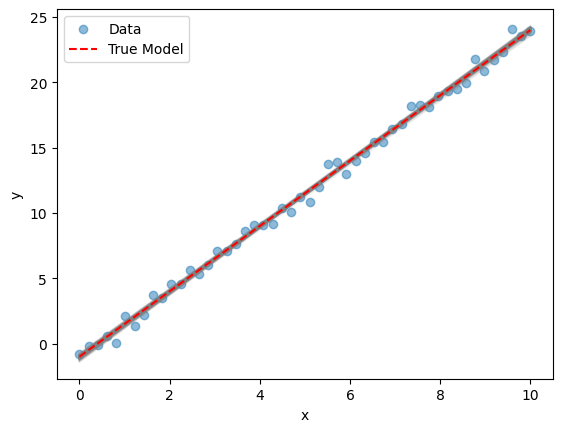

In [13]:
plt.scatter(x, y, label="Data", alpha=0.5)

# Plot 100 random posterior samples
for m, b, log_sigma in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(x, m * x + b, color="gray", alpha=0.1)

# True model
plt.plot(x, true_m * x + true_b, color="red", label="True Model", linestyle="dashed")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()